In [1]:
import pandas as pd

In [2]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
X = data_breast_cancer.data[['mean texture','mean symmetry']].values
X

array([[10.38  ,  0.2419],
       [17.77  ,  0.1812],
       [21.25  ,  0.2069],
       ...,
       [28.08  ,  0.159 ],
       [29.33  ,  0.2397],
       [24.54  ,  0.1587]])

In [4]:
y = data_breast_cancer['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

best_f1_score = 0
best_depth = None
for depth in range (1,36):
    tree_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split=10).fit(X_train,y_train)


    y_train_pred = tree_clf.predict(X_train)
    train_f1_score = f1_score(y_train, y_train_pred)

    y_test_pred = tree_clf.predict(X_test)
    test_f1_score = f1_score(y_test, y_test_pred)

    print(f"Depth: {depth} train_score: {train_f1_score} test_score: {test_f1_score}")
    combined_f1_score = (train_f1_score+test_f1_score)/2

    if combined_f1_score>best_f1_score:
        best_f1_score = combined_f1_score
        best_depth = depth

print(f"Best f1 score: {best_f1_score} on depth: {best_depth}")
    

Depth: 1 train_score: 0.7539062500000001 test_score: 0.6949152542372881
Depth: 2 train_score: 0.8211243611584327 test_score: 0.7887323943661971
Depth: 3 train_score: 0.8211243611584327 test_score: 0.7887323943661971
Depth: 4 train_score: 0.8435374149659863 test_score: 0.7647058823529411
Depth: 5 train_score: 0.8647746243739566 test_score: 0.7222222222222221
Depth: 6 train_score: 0.8827586206896552 test_score: 0.6950354609929078
Depth: 7 train_score: 0.8957264957264957 test_score: 0.6993006993006993
Depth: 8 train_score: 0.9027777777777778 test_score: 0.6956521739130436
Depth: 9 train_score: 0.903914590747331 test_score: 0.6564885496183206
Depth: 10 train_score: 0.9094138543516873 test_score: 0.6564885496183206
Depth: 11 train_score: 0.9138840070298769 test_score: 0.6567164179104478
Depth: 12 train_score: 0.9138840070298769 test_score: 0.6567164179104478
Depth: 13 train_score: 0.9138840070298769 test_score: 0.6567164179104478
Depth: 14 train_score: 0.914185639229422 test_score: 0.656716

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = best_depth)
tree_clf.fit(X_train,y_train)
tree_clf

DecisionTreeClassifier(max_depth=2)

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file = "breast.dot",
    feature_names = ['mean texture','mean symmetry'],
    class_names = data_breast_cancer.target_names,
    rounded = True,
    filled = True
)

In [9]:
data_breast_cancer.feature_names.size

30

In [10]:
data_breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
import graphviz
graphviz.render('dot','png',filepath='breast.dot',outfile='bc.png')

'bc.png'

In [12]:
from sklearn.metrics import accuracy_score
import pickle
ex1 = []
ex1.append(best_depth)
y_train_pred = tree_clf.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
ex1.append(train_f1_score)

y_test_pred = tree_clf.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
ex1.append(test_f1_score)

ex1.append(accuracy_score(y_train, y_train_pred))
ex1.append(accuracy_score(y_test, y_test_pred))

with open('f1acc_tree.pkl', 'wb') as out:
    pickle.dump(ex1,out)
ex1

[2,
 0.8211243611584327,
 0.7887323943661971,
 0.7692307692307693,
 0.7368421052631579]

<Axes: xlabel='x', ylabel='y'>

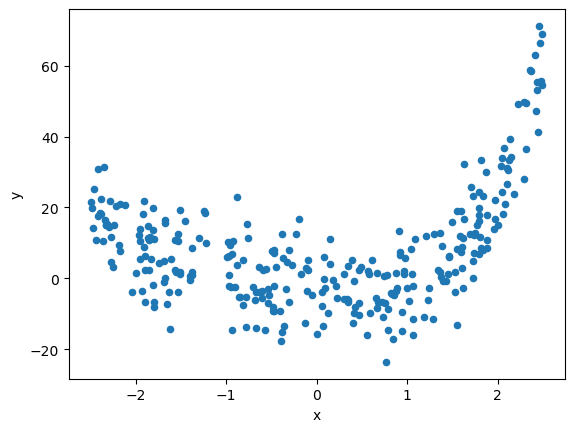

In [13]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [14]:
y.size

300

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y.reshape(-1,1), test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
best_mse_score = float('inf')
best_depth2 = None
for depth in range(1,26):
    tree_reg = DecisionTreeRegressor(max_depth=depth,min_weight_fraction_leaf=0.1).fit(X_train,y_train)

    y_train_pred = tree_reg.predict(X_train)
    y_train_mse_score = mean_squared_error(y_train,y_train_pred)


    y_test_pred = tree_reg.predict(X_test)
    y_test_mse_score = mean_squared_error(y_test,y_test_pred)

    print(f"Depth: {depth} train_score: {y_train_mse_score} test_score: {y_test_mse_score}")
    combined_mse_score = (y_train_mse_score+y_test_mse_score)/2

    if combined_mse_score < best_mse_score:  
        best_mse_score = combined_mse_score
        best_depth2 = depth

print(f"Best mse score: {best_mse_score} on depth: {best_depth2}")

    
    
    


Depth: 1 train_score: 134.9264027977583 test_score: 102.62579167356965
Depth: 2 train_score: 117.97141318868671 test_score: 95.65755959049973
Depth: 3 train_score: 98.35876647515512 test_score: 75.83103711910657
Depth: 4 train_score: 88.80562540712005 test_score: 70.06301197149787
Depth: 5 train_score: 87.75356387007392 test_score: 66.47799340783976
Depth: 6 train_score: 86.28684477608807 test_score: 67.34288666571142
Depth: 7 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 8 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 9 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 10 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 11 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 12 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 13 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 14 train_score: 86.03424107233786 test_score: 67.49475834258774
Depth: 15 tra

In [17]:
tree_reg = DecisionTreeRegressor(max_depth=best_depth2).fit(X_train,y_train)
y_train_pred = tree_reg.predict(X_train)
y_train_mse_score = mean_squared_error(y_train,y_train_pred)


y_test_pred = tree_reg.predict(X_test)
y_test_mse_score = mean_squared_error(y_test,y_test_pred)

ex2 = [best_depth2,y_train_mse_score,y_test_mse_score]

with open('mse_tree.pkl', 'wb') as out:
    pickle.dump(ex2,out)

ex2

[7, 43.39884731822853, 81.3206203537837]

In [18]:
export_graphviz(tree_reg,out_file="reg.dot",rounded=True,filled=True)
graphviz.render('dot','png',filepath='reg.dot',outfile='reg.png')

'reg.png'

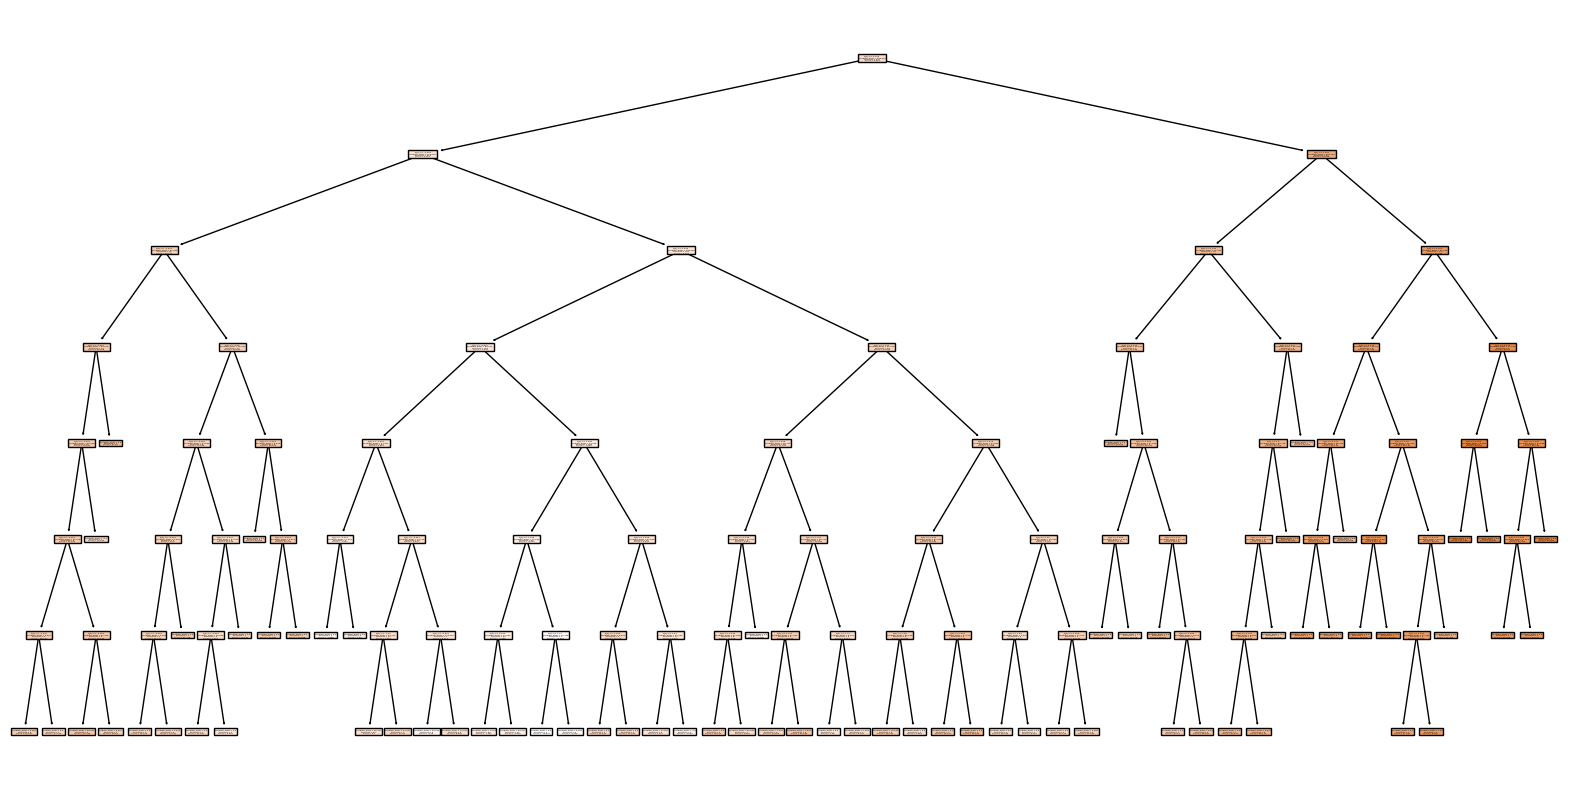

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you already have your DecisionTreeRegressor trained and named tree_reg
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(tree_reg, filled=True)  # Assuming X_train is your feature matrix
plt.show()

<Axes: xlabel='x', ylabel='y'>

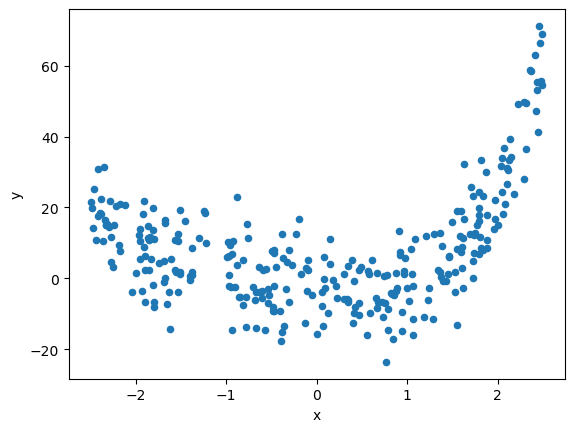

In [20]:
df.plot.scatter(x='x',y='y')